In [1]:
import gzip
import pandas as pd
import numpy as np
from mnist import MNIST
import torch
from torch import nn
import copy
import torch.optim as optim
import torch.nn.functional as F

In [2]:
import torch
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(device)

cuda


In [3]:
fake_data_file_path = "Data/fake_data_generated.csv"
Discriminator_model_file_path = "Model/Discriminator_model.pt"
GAN_model_file_path = "Model/GAN_model.pt"

In [4]:
def random_array_generation(array_size, no_of_array):
    array_generated = np.random.rand(no_of_array, array_size)
    return array_generated

In [5]:
mndata = MNIST('Data')
#images, labels = mndata.load_training()
images, labels = mndata.load_testing()

#print(labels)
len(images[0])

real_input_tensor = torch.Tensor(images)
real_output_tensor = torch.Tensor([1 for i in range(real_input_tensor.size(0))])

In [6]:
fake_data = 1
if fake_data == 0:
    array_generated = random_array_generation(100, 10000)
    np.savetxt(fake_data_file_path, array_generated, delimiter=",")
else:
    array_generated = pd.read_csv(fake_data_file_path, header = None)

fake_input_tensor = torch.Tensor(array_generated.values)
fake_output_tensor = torch.Tensor([0 for i in range(fake_input_tensor.size(0))])

In [7]:
real_input_tensor[0]
#real_output_tensor
fake_input_tensor[0]

tensor([0.8113, 0.8830, 0.1161, 0.9041, 0.8295, 0.5640, 0.9597, 0.6732, 0.0773,
        0.1733, 0.2507, 0.6257, 0.9794, 0.8131, 0.3409, 0.2037, 0.1561, 0.0355,
        0.5426, 0.2767, 0.3555, 0.7762, 0.0477, 0.5486, 0.8409, 0.4584, 0.2002,
        0.7612, 0.9665, 0.6159, 0.1208, 0.2811, 0.6921, 0.0898, 0.7824, 0.8461,
        0.4351, 0.9992, 0.0376, 0.0379, 0.6627, 0.2711, 0.9265, 0.7212, 0.3231,
        0.1601, 0.4817, 0.1492, 0.5890, 0.4626, 0.2383, 0.6736, 0.7089, 0.3591,
        0.5928, 0.4461, 0.3668, 0.2426, 0.3939, 0.3521, 0.2196, 0.7634, 0.2150,
        0.8353, 0.6717, 0.5992, 0.1051, 0.9078, 0.4213, 0.4814, 0.1232, 0.9127,
        0.4303, 0.7778, 0.7342, 0.6365, 0.2763, 0.2299, 0.8172, 0.6221, 0.7781,
        0.4370, 0.7914, 0.7638, 0.9722, 0.0175, 0.2349, 0.3645, 0.2698, 0.4705,
        0.3708, 0.1050, 0.1174, 0.5793, 0.8773, 0.4560, 0.3683, 0.7286, 0.3473,
        0.1747])

In [8]:
fake_input_tensor.size(0)
fake_output_tensor

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [9]:
class GAN_Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(GAN_Model, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 512)
        self.fc3 = nn.Linear(512, output_size)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x

In [10]:
class Discriminator_Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Discriminator_Model, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, output_size)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))

        return x

In [11]:
#
learning_rate_Discriminator = 0.08
epoch_size_Discriminator = 5
steps_for_printing_out_loss_Discriminator = 5

Discriminator_Model_WIP = Discriminator_Model(input_size = 784, output_size = 1)

Discriminator_Model_WIP.to(device)
loss_functioin_Discriminator = nn.MSELoss()
optimizer_Discriminator = optim.SGD(Discriminator_Model_WIP.parameters(), lr = learning_rate_Discriminator)

input_real = (real_input_tensor/ 256).cuda()
target_real = real_output_tensor.cuda()
#input_fake = fake_input_tensor
target_fake = fake_output_tensor.cuda()
print(fake_input_tensor[0])
def Discriminator_training_model():
    input_fake = GAN_Model_WIP(fake_input_tensor.cuda())
    #print(input_fake[0])
    for i in range(1, epoch_size_Discriminator + 1):
        optimizer_Discriminator.zero_grad()
        output_real = Discriminator_Model_WIP(input_real.cuda())
        loss_real = loss_functioin_Discriminator(output_real, target_real.reshape(output_real.size(0), output_real.size(1)))
        loss_real.backward()
        #loss_real.backward()
        output_fake = Discriminator_Model_WIP(input_fake.cuda())
        #print(output_real)
        loss_fake = loss_functioin_Discriminator(output_fake, target_fake.reshape(output_fake.size(0), output_fake.size(1)))
        loss_fake.backward(retain_graph=True)
        #loss_fake.backward()
        optimizer_Discriminator.step()
        loss_Discriminator = loss_real + loss_fake
        print(loss_real.cpu().detach().numpy())
        print(loss_fake.cpu().detach().numpy())
        
        if i % (steps_for_printing_out_loss_Discriminator) == 0:
            print('Loss (epoch: ' + str(i) + '): ' + str(loss_Discriminator.cpu().detach().numpy()))
    torch.save({'state_dict': Discriminator_Model_WIP.state_dict(),'optimizer': optimizer_Discriminator.state_dict()}, Discriminator_model_file_path)

tensor([0.8113, 0.8830, 0.1161, 0.9041, 0.8295, 0.5640, 0.9597, 0.6732, 0.0773,
        0.1733, 0.2507, 0.6257, 0.9794, 0.8131, 0.3409, 0.2037, 0.1561, 0.0355,
        0.5426, 0.2767, 0.3555, 0.7762, 0.0477, 0.5486, 0.8409, 0.4584, 0.2002,
        0.7612, 0.9665, 0.6159, 0.1208, 0.2811, 0.6921, 0.0898, 0.7824, 0.8461,
        0.4351, 0.9992, 0.0376, 0.0379, 0.6627, 0.2711, 0.9265, 0.7212, 0.3231,
        0.1601, 0.4817, 0.1492, 0.5890, 0.4626, 0.2383, 0.6736, 0.7089, 0.3591,
        0.5928, 0.4461, 0.3668, 0.2426, 0.3939, 0.3521, 0.2196, 0.7634, 0.2150,
        0.8353, 0.6717, 0.5992, 0.1051, 0.9078, 0.4213, 0.4814, 0.1232, 0.9127,
        0.4303, 0.7778, 0.7342, 0.6365, 0.2763, 0.2299, 0.8172, 0.6221, 0.7781,
        0.4370, 0.7914, 0.7638, 0.9722, 0.0175, 0.2349, 0.3645, 0.2698, 0.4705,
        0.3708, 0.1050, 0.1174, 0.5793, 0.8773, 0.4560, 0.3683, 0.7286, 0.3473,
        0.1747])


In [12]:
#
learning_rate_GAN = 0.08
epoch_size_GAN = 5
steps_for_printing_out_loss_GAN = 1

GAN_Model_WIP = GAN_Model(input_size = 100, output_size = 784)

GAN_Model_WIP.to(device)
loss_functioin_GAN = nn.MSELoss()
optimizer_GAN = optim.SGD(GAN_Model_WIP.parameters(), lr = learning_rate_GAN)
input_GAN = fake_input_tensor.cuda()
target_GAN = torch.Tensor([1 for i in range(input_GAN.size(0))]).cuda()
def GAN_training_model():
    for i in range(1, epoch_size_GAN + 1):
        optimizer_GAN.zero_grad()
        output_GAN = Discriminator_Model_WIP(GAN_Model_WIP(input_GAN.cuda()))
        loss_GAN = loss_functioin_GAN(output_GAN, target_GAN.reshape(output_GAN.size(0), output_GAN.size(1)))
        loss_GAN.backward()
        if i % (steps_for_printing_out_loss_GAN) == 0:
            print('Loss (epoch: ' + str(i) + '): ' + str(loss_GAN.cpu().detach().numpy()))
        optimizer_GAN.step()

    torch.save({'state_dict': GAN_Model_WIP.state_dict(),'optimizer': optimizer_GAN.state_dict()}, GAN_model_file_path)

In [13]:
no_of_training_loop = 100
for i in range(no_of_training_loop):
    Discriminator_training_model()
    GAN_training_model()

0.9902027
0.0
0.7409174
0.002593733
0.20029025
0.054878928
0.049930707
0.088123284
0.047202766
0.06841305
Loss (epoch: 5): 0.115615815
Loss (epoch: 1): 0.60145146
Loss (epoch: 2): 0.5862785
Loss (epoch: 3): 0.56843805
Loss (epoch: 4): 0.54812413
Loss (epoch: 5): 0.5254685
0.049205784
0.08566376
0.05754602
0.056875207
0.054006524
0.045901172
0.056742407
0.03276641
0.056095604
0.025956593
Loss (epoch: 5): 0.0820522
Loss (epoch: 1): 0.741037
Loss (epoch: 2): 0.70395863
Loss (epoch: 3): 0.6567504
Loss (epoch: 4): 0.6005244
Loss (epoch: 5): 0.53608316
0.057221692
0.10220908
0.08958082
0.042041127
0.0608952
0.050438225
0.078901365
0.02011194
0.06315894
0.026789105
Loss (epoch: 5): 0.08994804
Loss (epoch: 1): 0.8217771
Loss (epoch: 2): 0.7447291
Loss (epoch: 3): 0.6453071
Loss (epoch: 4): 0.532571
Loss (epoch: 5): 0.41507742
0.07623079
0.20488466
0.20652072
0.014678315
0.08044458
0.10904746
0.2621125
0.0
0.11538957
0.056194153
Loss (epoch: 5): 0.17158373
Loss (epoch: 1): 1.0
Loss (epoch: 2): 

Loss (epoch: 3): 0.68830967
Loss (epoch: 4): 0.5325822
Loss (epoch: 5): 0.3917774
0.018432535
0.2343869
0.16976506
0.0
0.03770114
0.0016297267
0.035338305
0.0
0.025417557
0.00014379247
Loss (epoch: 5): 0.02556135
Loss (epoch: 1): 0.99995214
Loss (epoch: 2): 0.99993914
Loss (epoch: 3): 0.99992126
Loss (epoch: 4): 0.9998937
Loss (epoch: 5): 0.9998411
0.023102896
6.752386e-07
0.020746704
0.00032068673
0.02001419
1.5030545e-05
0.018827975
0.000252318
0.018318685
4.9840535e-05
Loss (epoch: 5): 0.018368525
Loss (epoch: 1): 0.9750732
Loss (epoch: 2): 0.8637835
Loss (epoch: 3): 0.7105754
Loss (epoch: 4): 0.54984003
Loss (epoch: 5): 0.40586746
0.017528793
0.22609362
0.15909384
0.0
0.03716685
5.7691173e-06
0.030000072
0.0
0.022663804
1.6733515e-05
Loss (epoch: 5): 0.022680538
Loss (epoch: 1): 0.99996793
Loss (epoch: 2): 0.99996346
Loss (epoch: 3): 0.99995816
Loss (epoch: 4): 0.99995136
Loss (epoch: 5): 0.9999412
0.02041536
1.5260746e-07
0.018750723
0.00011097939
0.017966293
1.4643381e-05
0.01710

Loss (epoch: 2): 1.0
Loss (epoch: 3): 1.0
Loss (epoch: 4): 1.0
Loss (epoch: 5): 1.0
0.008905703
0.0
0.008608998
0.0
0.008388918
0.0
0.008197195
0.0
0.008021908
0.0
Loss (epoch: 5): 0.008021908
Loss (epoch: 1): 1.0
Loss (epoch: 2): 1.0
Loss (epoch: 3): 1.0
Loss (epoch: 4): 1.0
Loss (epoch: 5): 1.0
0.007858416
0.0
0.0077045653
0.0
0.0075584645
0.0
0.007419457
0.0
0.007286688
2.6286565e-11
Loss (epoch: 5): 0.007286688
Loss (epoch: 1): 0.9999984
Loss (epoch: 2): 0.9999984
Loss (epoch: 3): 0.9999984
Loss (epoch: 4): 0.9999984
Loss (epoch: 5): 0.9999984
0.0071595167
2.0061082e-09
0.007037376
1.4283202e-08
0.0069200024
5.2267826e-08
0.0068071303
1.6539397e-07
0.00669838
4.887725e-07
Loss (epoch: 5): 0.006698869
Loss (epoch: 1): 0.9995486
Loss (epoch: 2): 0.9986435
Loss (epoch: 3): 0.98968667
Loss (epoch: 4): 0.8992429
Loss (epoch: 5): 0.7613771
0.006593639
0.05430279
0.027616339
0.0
0.010891995
1.4511514e-07
0.008761557
0.0
0.0078806635
7.286848e-08
Loss (epoch: 5): 0.007880736
Loss (epoch: 1

Loss (epoch: 3): 0.81668365
Loss (epoch: 4): 0.65630037
Loss (epoch: 5): 0.4670323
0.009932954
0.20102262
0.1443834
0.0
0.019635702
0.0
0.014869418
0.0
0.012674366
0.0
Loss (epoch: 5): 0.012674366
Loss (epoch: 1): 1.0
Loss (epoch: 2): 1.0
Loss (epoch: 3): 1.0
Loss (epoch: 4): 1.0
Loss (epoch: 5): 1.0
0.011845868
0.0
0.011293036
0.0
0.01085202
0.0
0.010467064
0.0
0.010120243
0.0
Loss (epoch: 5): 0.010120243
Loss (epoch: 1): 1.0
Loss (epoch: 2): 1.0
Loss (epoch: 3): 1.0
Loss (epoch: 4): 1.0
Loss (epoch: 5): 1.0
0.009804405
0.0
0.009515055
0.0
0.009247092
0.0
0.0089976955
0.0
0.008765222
0.0
Loss (epoch: 5): 0.008765222
Loss (epoch: 1): 1.0
Loss (epoch: 2): 1.0
Loss (epoch: 3): 1.0
Loss (epoch: 4): 1.0
Loss (epoch: 5): 1.0


In [17]:
input_fake = GAN_Model_WIP(fake_input_tensor.cuda())

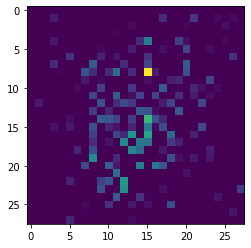

In [18]:
image_out = (input_fake[456]).reshape(28, 28).cpu().detach().numpy()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#img=mpimg.imread('your_image.png')
imgplot = plt.imshow(image_out)
plt.show()

In [16]:
(input_fake[1] ==input_fake[220])
input_fake[1]

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.6519e-03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 5.8024e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.3991e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4463e-02,
        0.0000e+00, 2.3693e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.8964e-03, 0.0000e+00, 0.0000e+00, 3.6550e-01, 0.0000e+00, 1.7755e-02,
        0.0000e+00, 3.7543e-01, 0.0000e+00, 0.0000e+00, 1.0400e-01, 0.0000e+00,
        2.7088e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4287e-02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 8.3631e-02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+